# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [141]:
#The objective is to help a used car dealership understand what factors influence the price of a used car

In [142]:
#The dealership wants to know what consumers value in a used car to optimize their inventory and pricing strategy.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [144]:
#Run a correlation matrix and do some plotting. Value counts to view variety of data

In [145]:
#describe, info, head, etc

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [147]:
# set up DF, look for NaN, missing data, outliers, ordinal, categorical, verify columns make sense, names are good.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [149]:
# Linear, ridge and lasso models with price as target

In [150]:
# Feature selection

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [152]:
# what factors make a car valuable to the consumer?

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [154]:
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np
import plotly.express as px
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import seaborn as sns

# Prep items


In [156]:
auto = pd.read_csv('data/vehicles.csv')

In [157]:
auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.ensemble import RandomForestRegressor


In [159]:
cols_with_missing = [col for col in auto.columns if auto[col].isnull().any()]

print("Columns with missing values :", cols_with_missing)
print("X_train_ful shape :", auto.shape)

Columns with missing values : ['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color']
X_train_ful shape : (426880, 18)


In [160]:
#drop rows that arents in price
auto = auto[auto['price'].notna()]

In [161]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [162]:
#Drop low value columns
auto=auto.drop(columns=['id','region', 'model', 'title_status', 'cylinders', 'VIN', 'size', 'paint_color'])

### Price (IQR, >5000 and drop outliers)

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


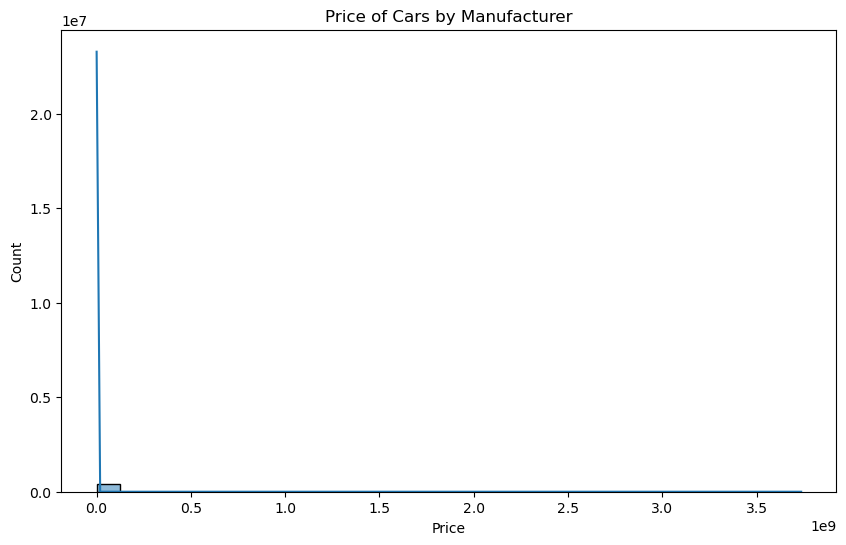

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(auto['price'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of Cars by Price')
plt.show()

In [165]:
# Calculate IQR
Q1 = auto['price'].quantile(0.25)
Q3 = auto['price'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds
lower_bound = 5000 ##Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
auto_no_outliers = auto[(auto['price'] >= lower_bound) & (auto['price'] <= upper_bound)]
auto['price']=auto_no_outliers['price']

In [166]:
auto['price'].isnull().value_counts()

price
False    323391
True     103489
Name: count, dtype: int64

In [167]:
auto = auto.dropna(subset=['price'])

In [168]:
# auto['price']=auto['price'].fillna(auto['price'].mean())

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


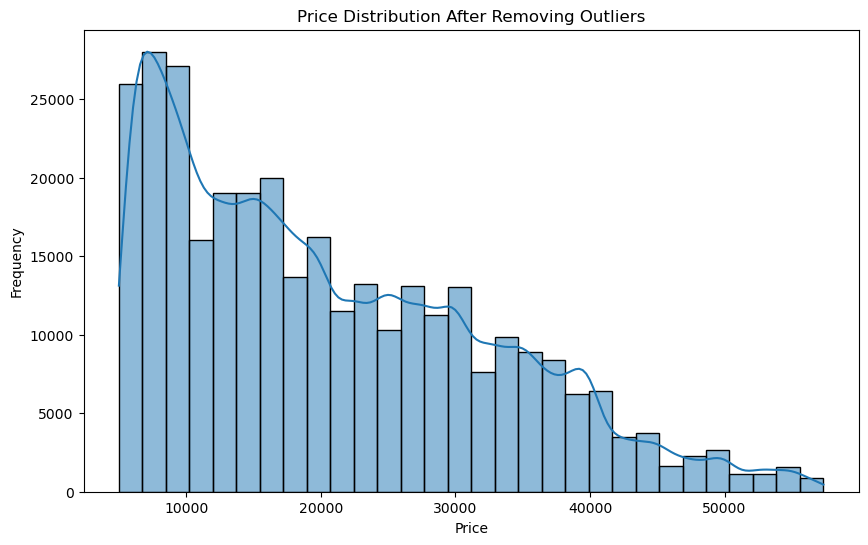

In [169]:
auto['price']=auto_no_outliers['price']
plt.figure(figsize=(10, 6))
sns.histplot(auto['price'], bins=30, kde=True)
plt.title('Price Distribution After Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

### Odometer IQR and Mean for nulls

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


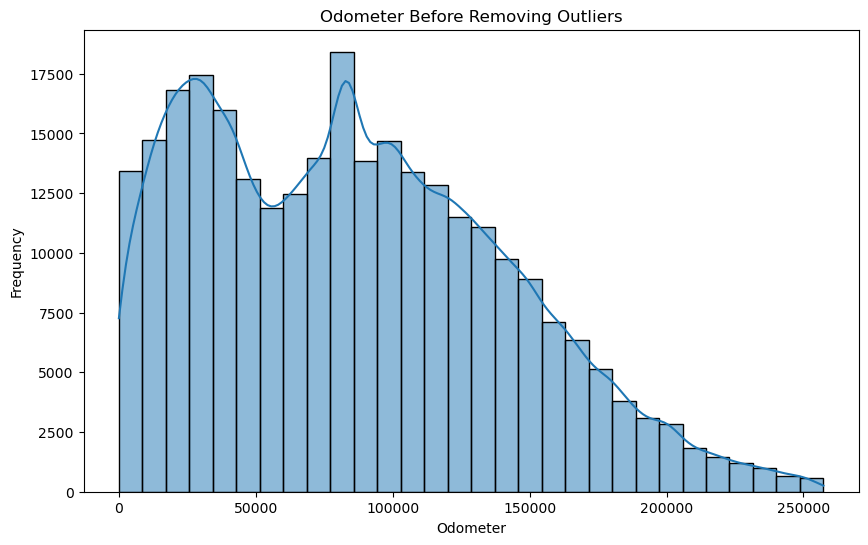

In [423]:
plt.figure(figsize=(10, 6))
sns.histplot(auto['odometer'], bins=30, kde=True)
plt.title('Odometer Before Removing Outliers')
plt.xlabel('Odometer')
plt.ylabel('Count')
plt.show()

In [172]:
# Calculate IQR
Q1 = auto['odometer'].quantile(0.25)
Q3 = auto['odometer'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
auto_no_outliers = auto[(auto['odometer'] >= lower_bound) & (auto['odometer'] <= upper_bound)]

In [173]:
auto['odometer']=auto_no_outliers['odometer']

In [174]:
auto['odometer'].isnull().value_counts()

odometer
False    318235
True       5156
Name: count, dtype: int64

In [175]:
auto['odometer']=auto['odometer'].replace(np.nan, auto['odometer'].mean())

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


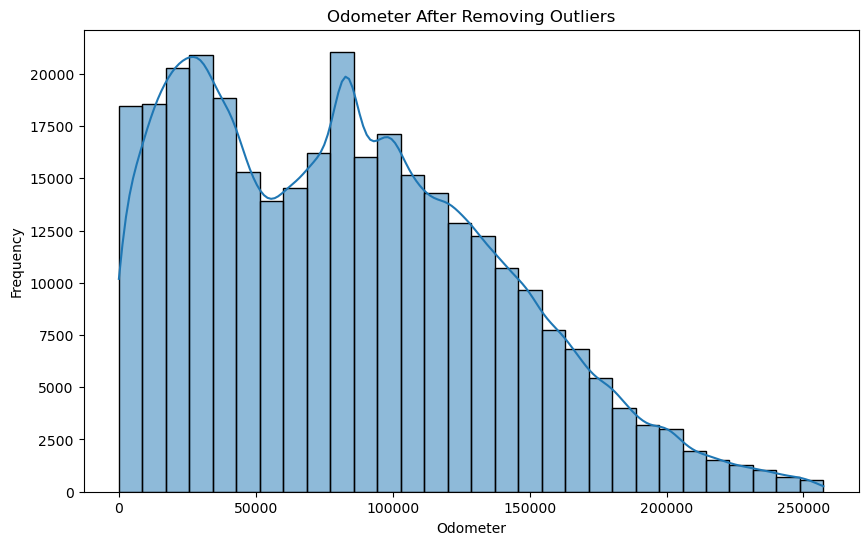

In [176]:
plt.figure(figsize=(10, 6))
sns.histplot(auto['odometer'], bins=30, kde=True)
plt.title('Odometer After Removing Outliers')
plt.xlabel('Odometer')
plt.ylabel('Count')
plt.show()

### Condition - ORDINAL

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


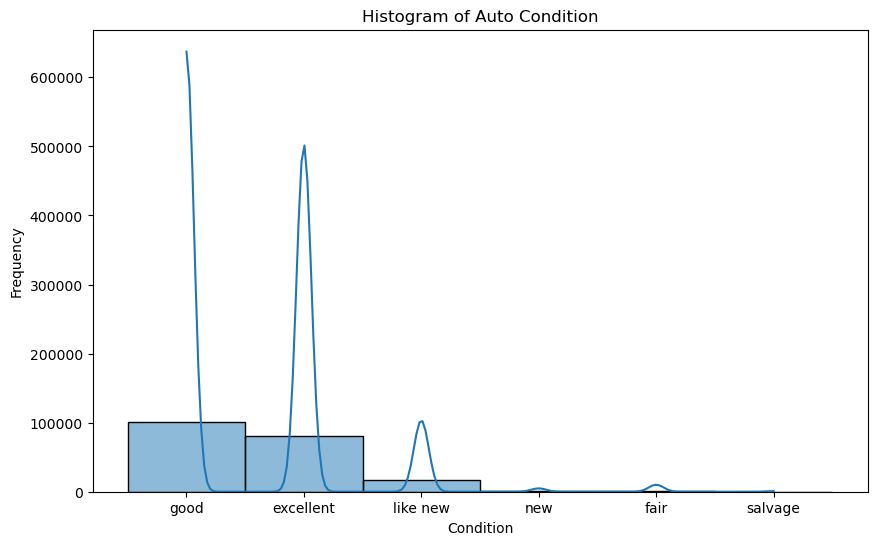

In [178]:
plt.figure(figsize=(10, 6))
sns.histplot(auto['condition'], bins=30, kde=True)
plt.title('Histogram of Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [179]:
auto['condition'].isnull().value_counts()

condition
False    200852
True     122539
Name: count, dtype: int64

In [180]:
auto['condition']=auto['condition'].replace(np.nan, 'no_data')

In [181]:
#Ordinal Data, convert to numeric

In [182]:
# from sklearn.preprocessing import OrdinalEncoder

# # Define the order of the categories
# categories = [['no_data', 'salvage', 'fair', 'good', 'excellent', 'like new','new']]

# # Create an OrdinalEncoder instance
# ordinal_encoder = OrdinalEncoder(categories=categories)

# # Perform ordinal encoding on 'condition' column
# auto['condition'] = ordinal_encoder.fit_transform(auto[['condition']])

# # Print the head of the DataFrame
# print(auto.head())


In [183]:
auto['condition'].value_counts()

condition
no_data      122539
good         101620
excellent     80206
like new      16505
fair           1613
new             771
salvage         137
Name: count, dtype: int64

### Fuel - OHE

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


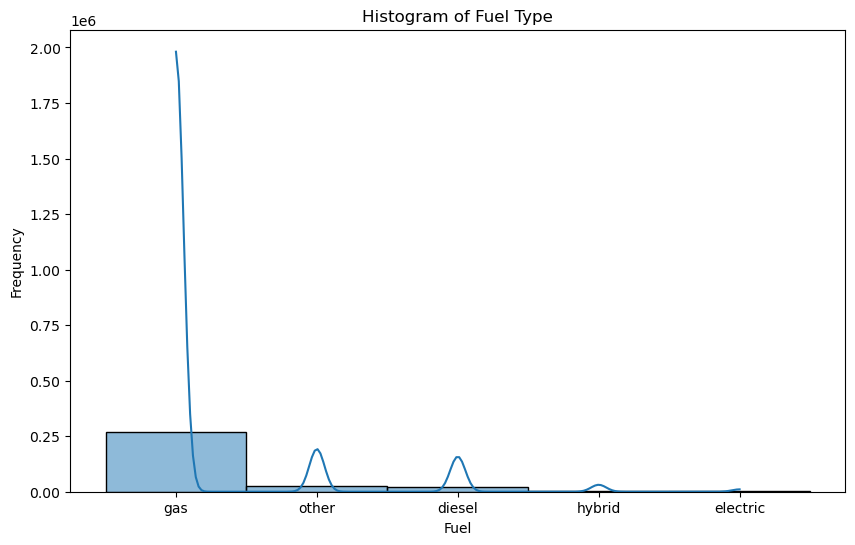

In [185]:
plt.figure(figsize=(10, 6))
sns.histplot(auto['fuel'], bins=30, kde=True)
plt.title('Histogram of Fuel Type')
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.show()

In [186]:
auto['fuel'].isnull().value_counts()

fuel
False    320943
True       2448
Name: count, dtype: int64

In [187]:
auto['fuel']=auto['fuel'].replace(np.nan, 'no_data')

In [188]:
# # one hot encode transmission
# from sklearn.preprocessing import OneHotEncoder

# # Create a OneHotEncoder instance
# ohe = OneHotEncoder()

# # Perform one hot encoding on 'manufacturer' column
# auto_encoded = ohe.fit_transform(auto[['fuel']]).toarray()

# # Create a DataFrame from the encoded data
# auto_encoded_df = pd.DataFrame(auto_encoded, columns=ohe.get_feature_names_out(['fuel']))

# # Concatenate the original DataFrame and the encoded DataFrame
# auto = pd.concat([auto, auto_encoded_df], axis=1)

# # Drop the original 'manufacturer' column
# auto.drop('fuel', axis=1, inplace=True)

# # Print the head of the DataFrame and the categories
# print(auto.head())
# print(categories)

### Drive - OHE

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


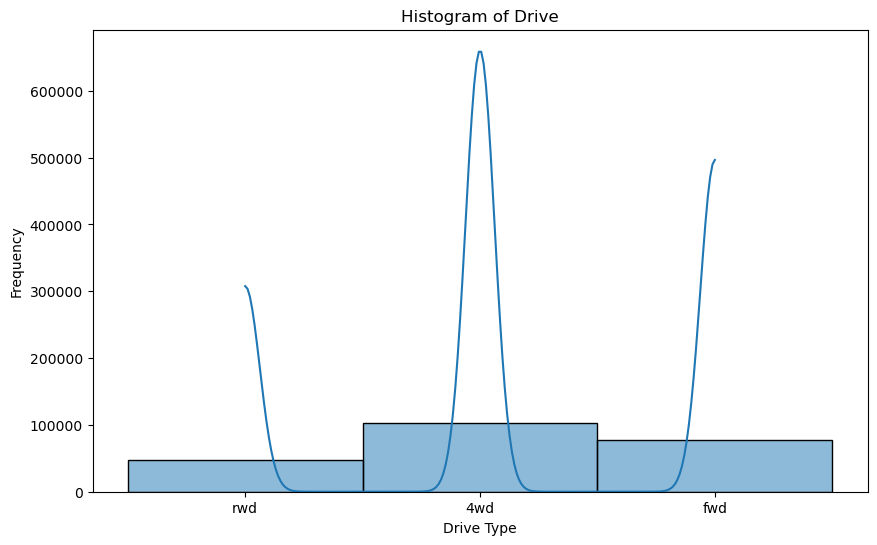

In [190]:
plt.figure(figsize=(10, 6))
sns.histplot(auto['drive'], bins=30, kde=True)
plt.title('Histogram of Drive')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.show()

In [191]:
auto['drive'].isnull().value_counts()

drive
False    227294
True      96097
Name: count, dtype: int64

In [192]:
auto['drive']=auto['drive'].replace(np.nan, 'no_data')

In [193]:
# # one hot encode transmission
# from sklearn.preprocessing import OneHotEncoder

# # Create a OneHotEncoder instance
# ohe = OneHotEncoder()

# # Perform one hot encoding on 'manufacturer' column
# auto_encoded = ohe.fit_transform(auto[['drive']]).toarray()

# # Create a DataFrame from the encoded data
# auto_encoded_df = pd.DataFrame(auto_encoded, columns=ohe.get_feature_names_out(['drive']))

# # Concatenate the original DataFrame and the encoded DataFrame
# auto = pd.concat([auto, auto_encoded_df], axis=1)

# # Drop the original 'manufacturer' column
# auto.drop('drive', axis=1, inplace=True)

# # Print the head of the DataFrame and the categories
# print(auto.head())
# print(categories)

### Transmission - OHE

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


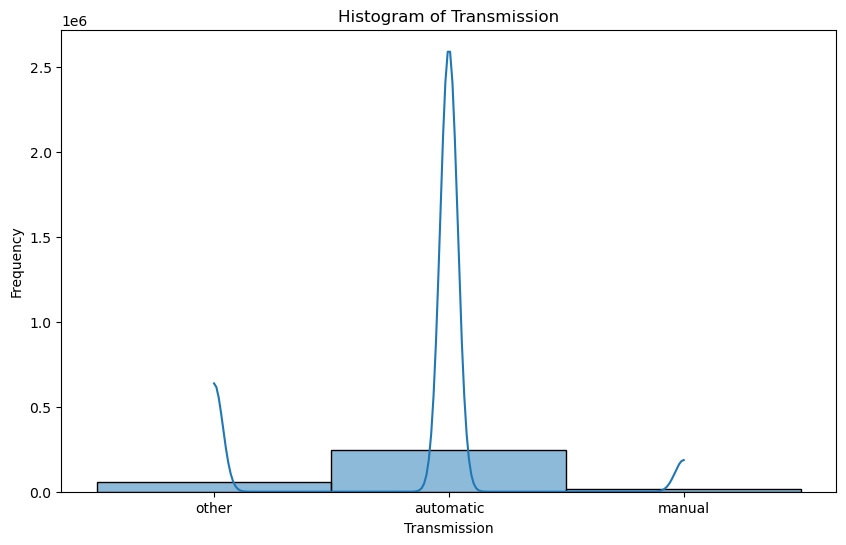

In [195]:
plt.figure(figsize=(10, 6))
sns.histplot(auto['transmission'], bins=30, kde=True)
plt.title('Histogram of Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

In [196]:
auto['transmission'].value_counts()

transmission
automatic    244630
other         59693
manual        17462
Name: count, dtype: int64

In [197]:
auto['transmission'].isnull().value_counts()

transmission
False    321785
True       1606
Name: count, dtype: int64

In [198]:
auto['transmission']=auto['transmission'].replace(np.nan, 'no_data')

In [199]:
# # one hot encode transmission
# from sklearn.preprocessing import OneHotEncoder

# # Create a OneHotEncoder instance
# ohe = OneHotEncoder()

# # Perform one hot encoding on 'manufacturer' column
# auto_encoded = ohe.fit_transform(auto[['transmission']]).toarray()

# # Create a DataFrame from the encoded data
# auto_encoded_df = pd.DataFrame(auto_encoded, columns=ohe.get_feature_names_out(['transmission']))

# # Concatenate the original DataFrame and the encoded DataFrame
# auto = pd.concat([auto, auto_encoded_df], axis=1)

# # Drop the original 'manufacturer' column
# auto.drop('transmission', axis=1, inplace=True)

# # Print the head of the DataFrame and the categories
# print(auto.head())
# print(categories)

### Type - OHE

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


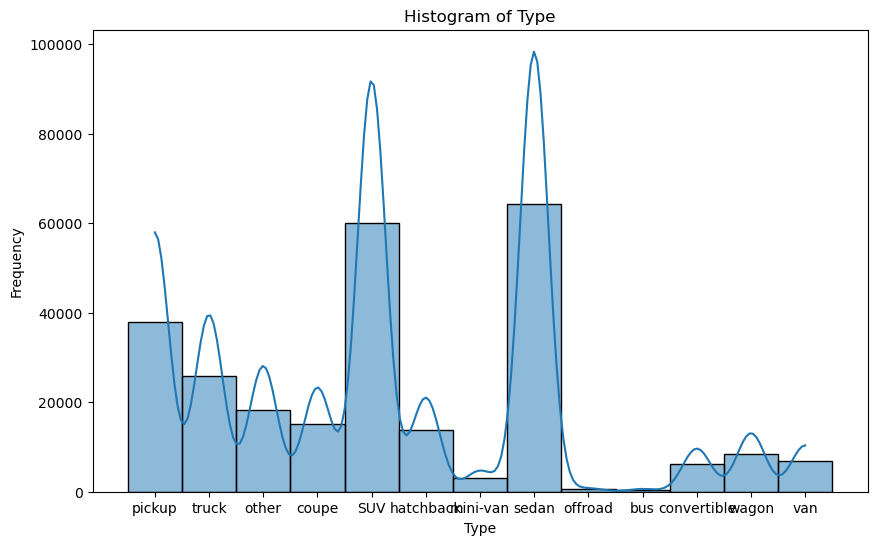

In [201]:
plt.figure(figsize=(10, 6))
sns.histplot(auto['type'], bins=30, kde=True)
plt.title('Histogram of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [202]:
auto['type'].isnull().value_counts()

type
False    260610
True      62781
Name: count, dtype: int64

In [203]:
auto['type']=auto['type'].replace(np.nan, 'no_data')

In [204]:
# # one hot encode state
# from sklearn.preprocessing import OneHotEncoder

# # Create a OneHotEncoder instance
# ohe = OneHotEncoder()

# # Perform one hot encoding on 'manufacturer' column
# auto_encoded = ohe.fit_transform(auto[['type']]).toarray()

# # Create a DataFrame from the encoded data
# auto_encoded_df = pd.DataFrame(auto_encoded, columns=ohe.get_feature_names_out(['type']))

# # Concatenate the original DataFrame and the encoded DataFrame
# auto = pd.concat([auto, auto_encoded_df], axis=1)

# # Drop the original 'manufacturer' column
# auto.drop('type', axis=1, inplace=True)

# # Print the head of the DataFrame and the categories
# print(auto.head())
# print(categories)

### State OHE

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


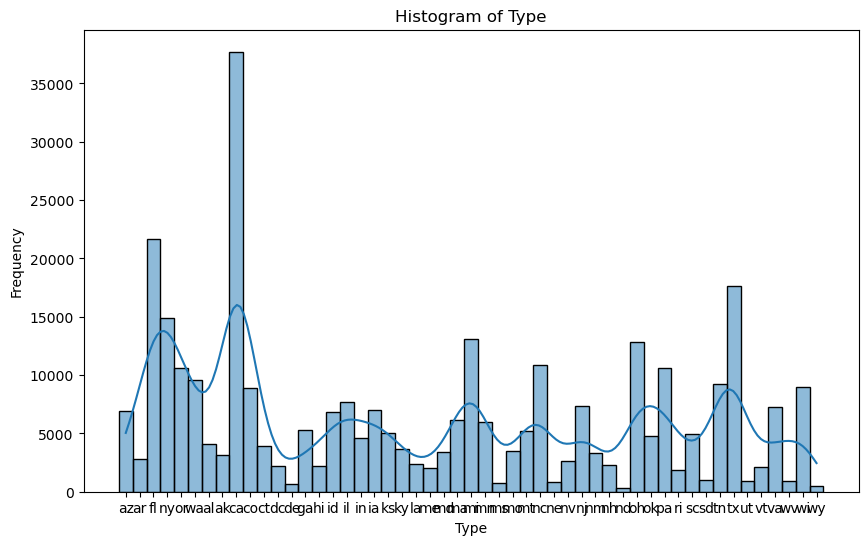

In [206]:
plt.figure(figsize=(10, 6))
sns.histplot(auto['state'], bins=30, kde=True)
plt.title('Histogram of State')
plt.xlabel('Count')
plt.show()

In [207]:
auto['state'].isnull().value_counts()

state
False    323391
Name: count, dtype: int64

In [208]:
# # one hot encode state
# from sklearn.preprocessing import OneHotEncoder

# # Create a OneHotEncoder instance
# ohe = OneHotEncoder()

# # Perform one hot encoding on 'manufacturer' column
# auto_encoded = ohe.fit_transform(auto[['state']]).toarray()

# # Create a DataFrame from the encoded data
# auto_encoded_df = pd.DataFrame(auto_encoded, columns=ohe.get_feature_names_out(['state']))

# # Concatenate the original DataFrame and the encoded DataFrame
# auto = pd.concat([auto, auto_encoded_df], axis=1)

# # Drop the original 'manufacturer' column
# auto.drop('state', axis=1, inplace=True)

# # Print the head of the DataFrame and the categories
# print(auto.head())
# print(categories)

### Year - Drop cars older than 1990

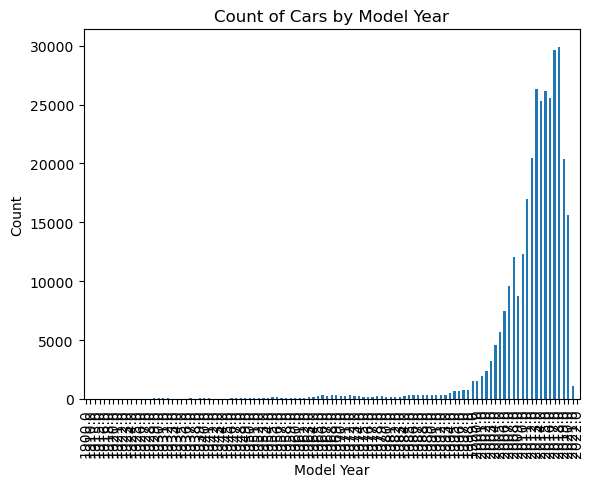

In [210]:
counts = auto['year'].value_counts()
sorted_counts = counts.sort_index()
sorted_counts.plot(kind='bar')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Count of Cars by Model Year')
plt.show()


In [211]:
auto['year'].isnull().value_counts()

year
False    322440
True        951
Name: count, dtype: int64

In [212]:
#Drop old cars
auto = auto[auto['year'] >= 1990]


### Manufacturer - OHE

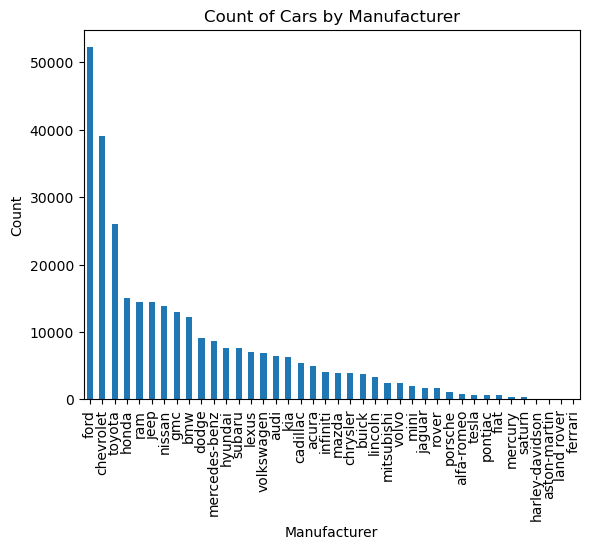

In [214]:
auto['manufacturer'].value_counts().plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Count of Cars by Manufacturer')
plt.show()

In [215]:
auto['manufacturer'].isnull().value_counts()

manufacturer
False    304229
True       9198
Name: count, dtype: int64

In [216]:
auto['manufacturer']=auto['manufacturer'].replace(np.nan, 'no_data')

In [217]:
# # one hot encode manufacturer
# from sklearn.preprocessing import OneHotEncoder

# # Create a OneHotEncoder instance
# ohe = OneHotEncoder()

# # Perform one hot encoding on 'manufacturer' column
# auto_encoded = ohe.fit_transform(auto[['manufacturer']]).toarray()

# # Create a DataFrame from the encoded data
# auto_encoded_df = pd.DataFrame(auto_encoded, columns=ohe.get_feature_names_out(['manufacturer']))

# # Concatenate the original DataFrame and the encoded DataFrame
# auto = pd.concat([auto, auto_encoded_df], axis=1)

# # Drop the original 'manufacturer' column
# auto.drop('manufacturer', axis=1, inplace=True)

# # Print the head of the DataFrame and the categories
# print(auto.head())
# print(categories)

In [218]:
auto = auto.dropna(subset=['price'])

In [219]:
auto['price'].isnull().value_counts()

price
False    313427
Name: count, dtype: int64

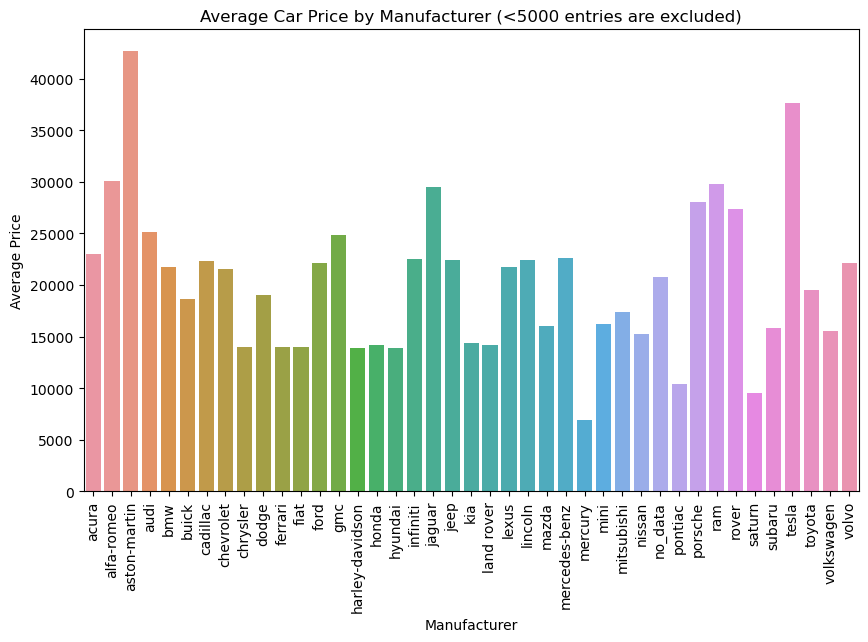

In [220]:
# Calculate the average price for each manufacturer
average_price = auto.groupby('manufacturer')['price'].mean().reset_index()

# Count the number of entries for each manufacturer
manufacturer_counts = auto['manufacturer'].value_counts()

# Get a list of manufacturers with more than 2500 entries
valid_manufacturers = manufacturer_counts[manufacturer_counts >= 5000].index

# Filter the DataFrame to only include these manufacturers
auto = auto[auto['manufacturer'].isin(valid_manufacturers)]

# Create a bar plot of the average price for each manufacturer
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer', y='price', data=average_price)
plt.title('Average Car Price by Manufacturer (Manufacturers with <5000 entries are excluded)')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Drop rows that arent in price

In [222]:
auto = auto.dropna(subset=['price'])

In [ ]:
auto['price'].isnull().value_counts()

# Summary of data

In [225]:
# auto.info()

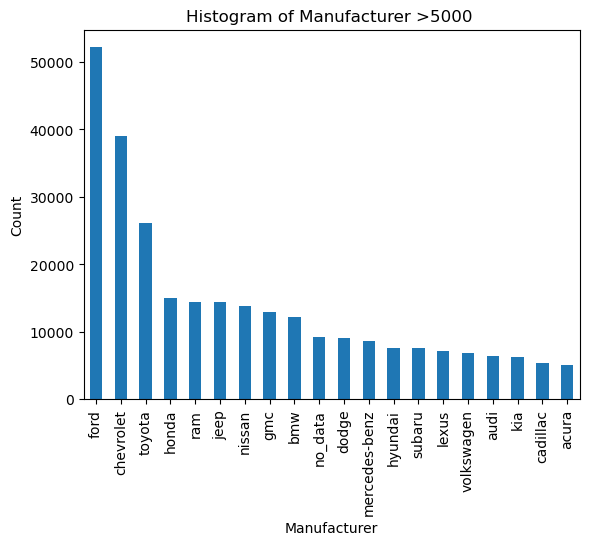

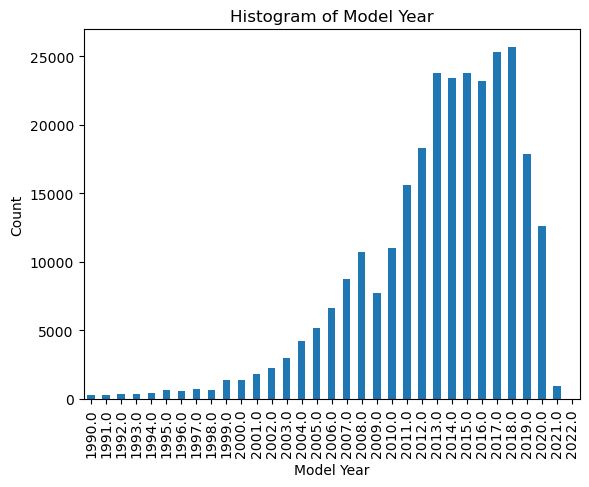

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


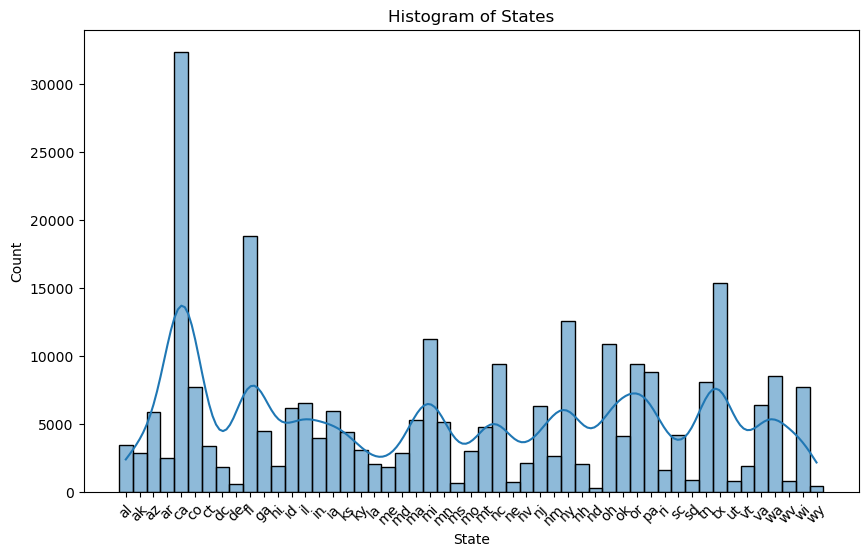

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


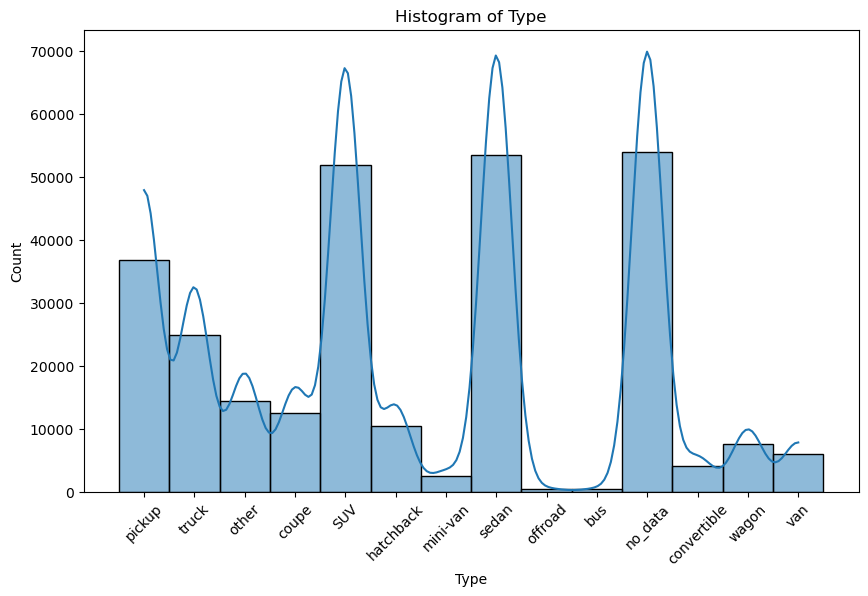

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


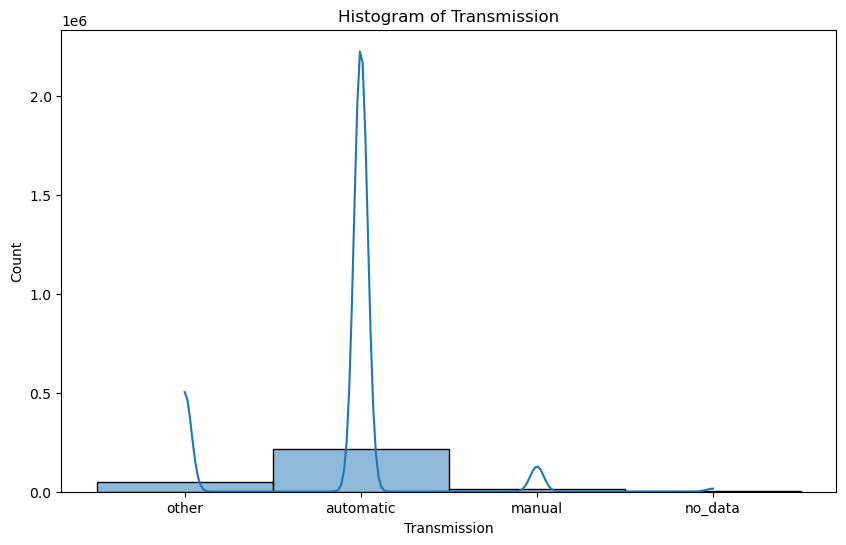

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


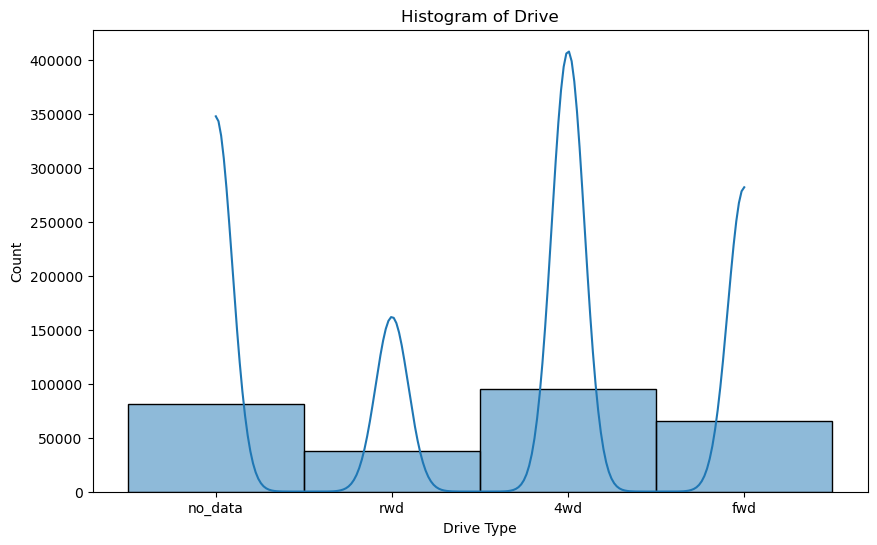

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


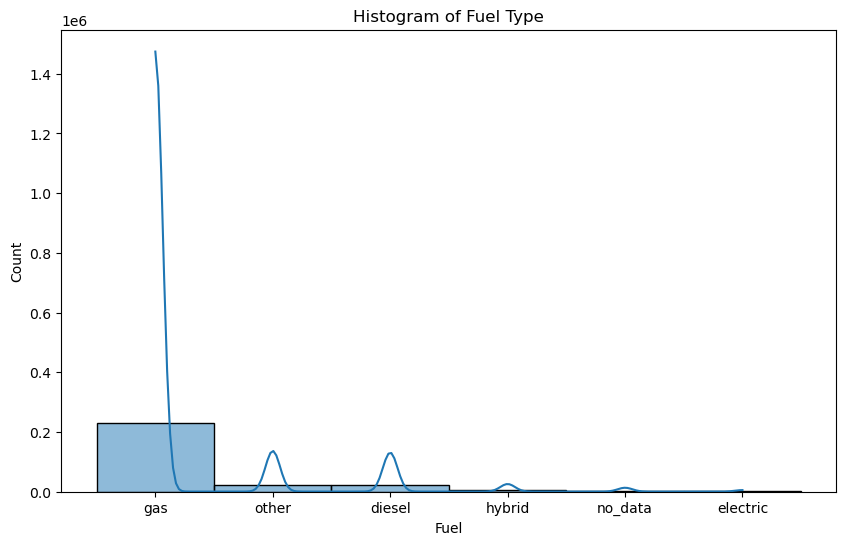

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


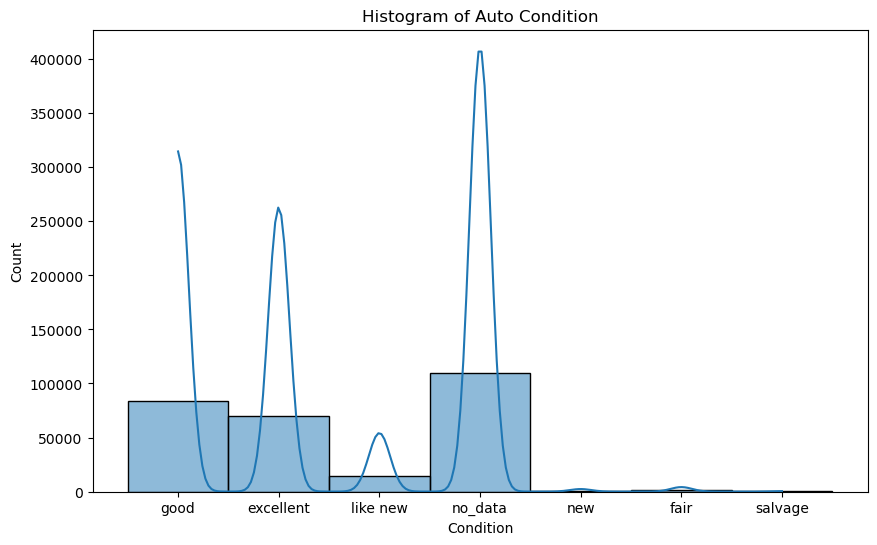

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


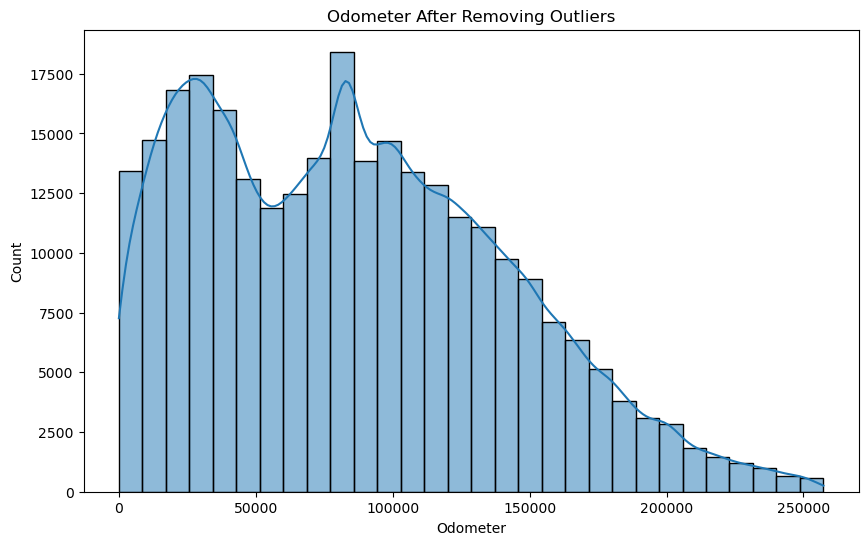

C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


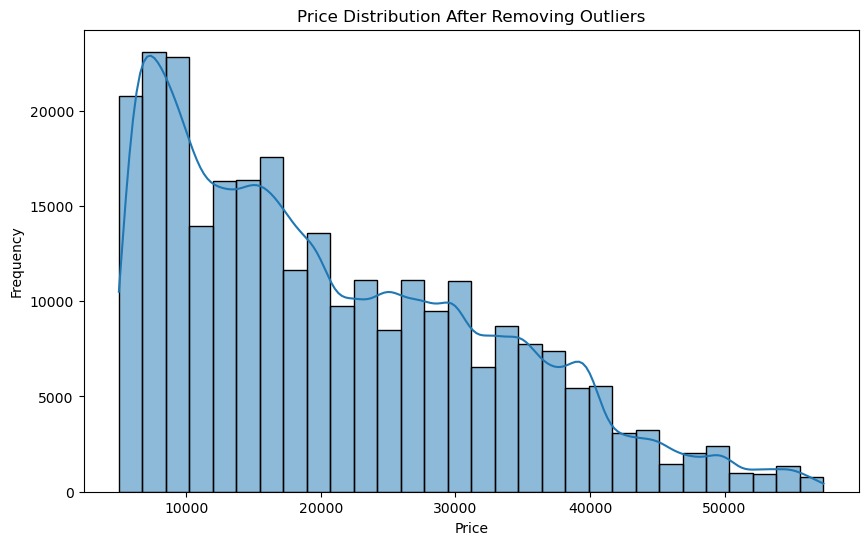

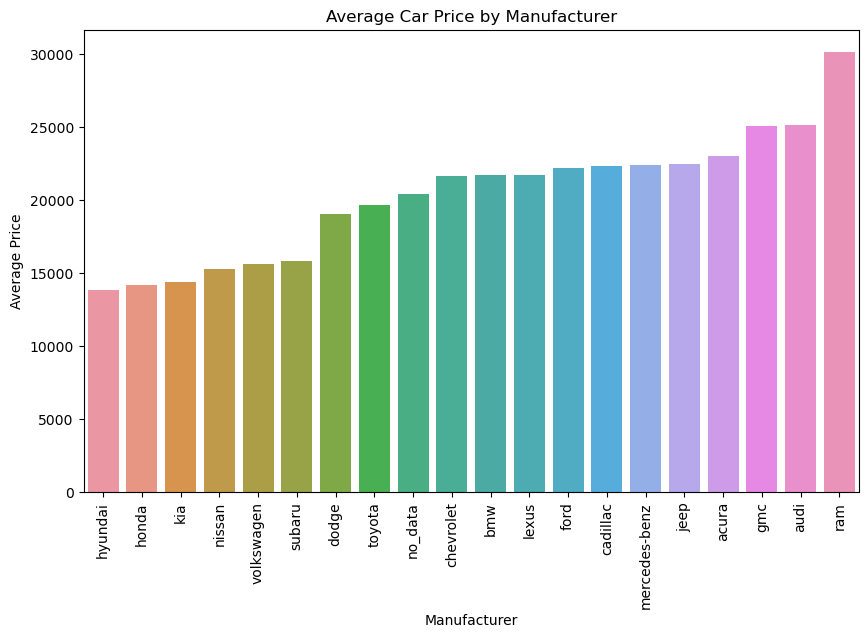

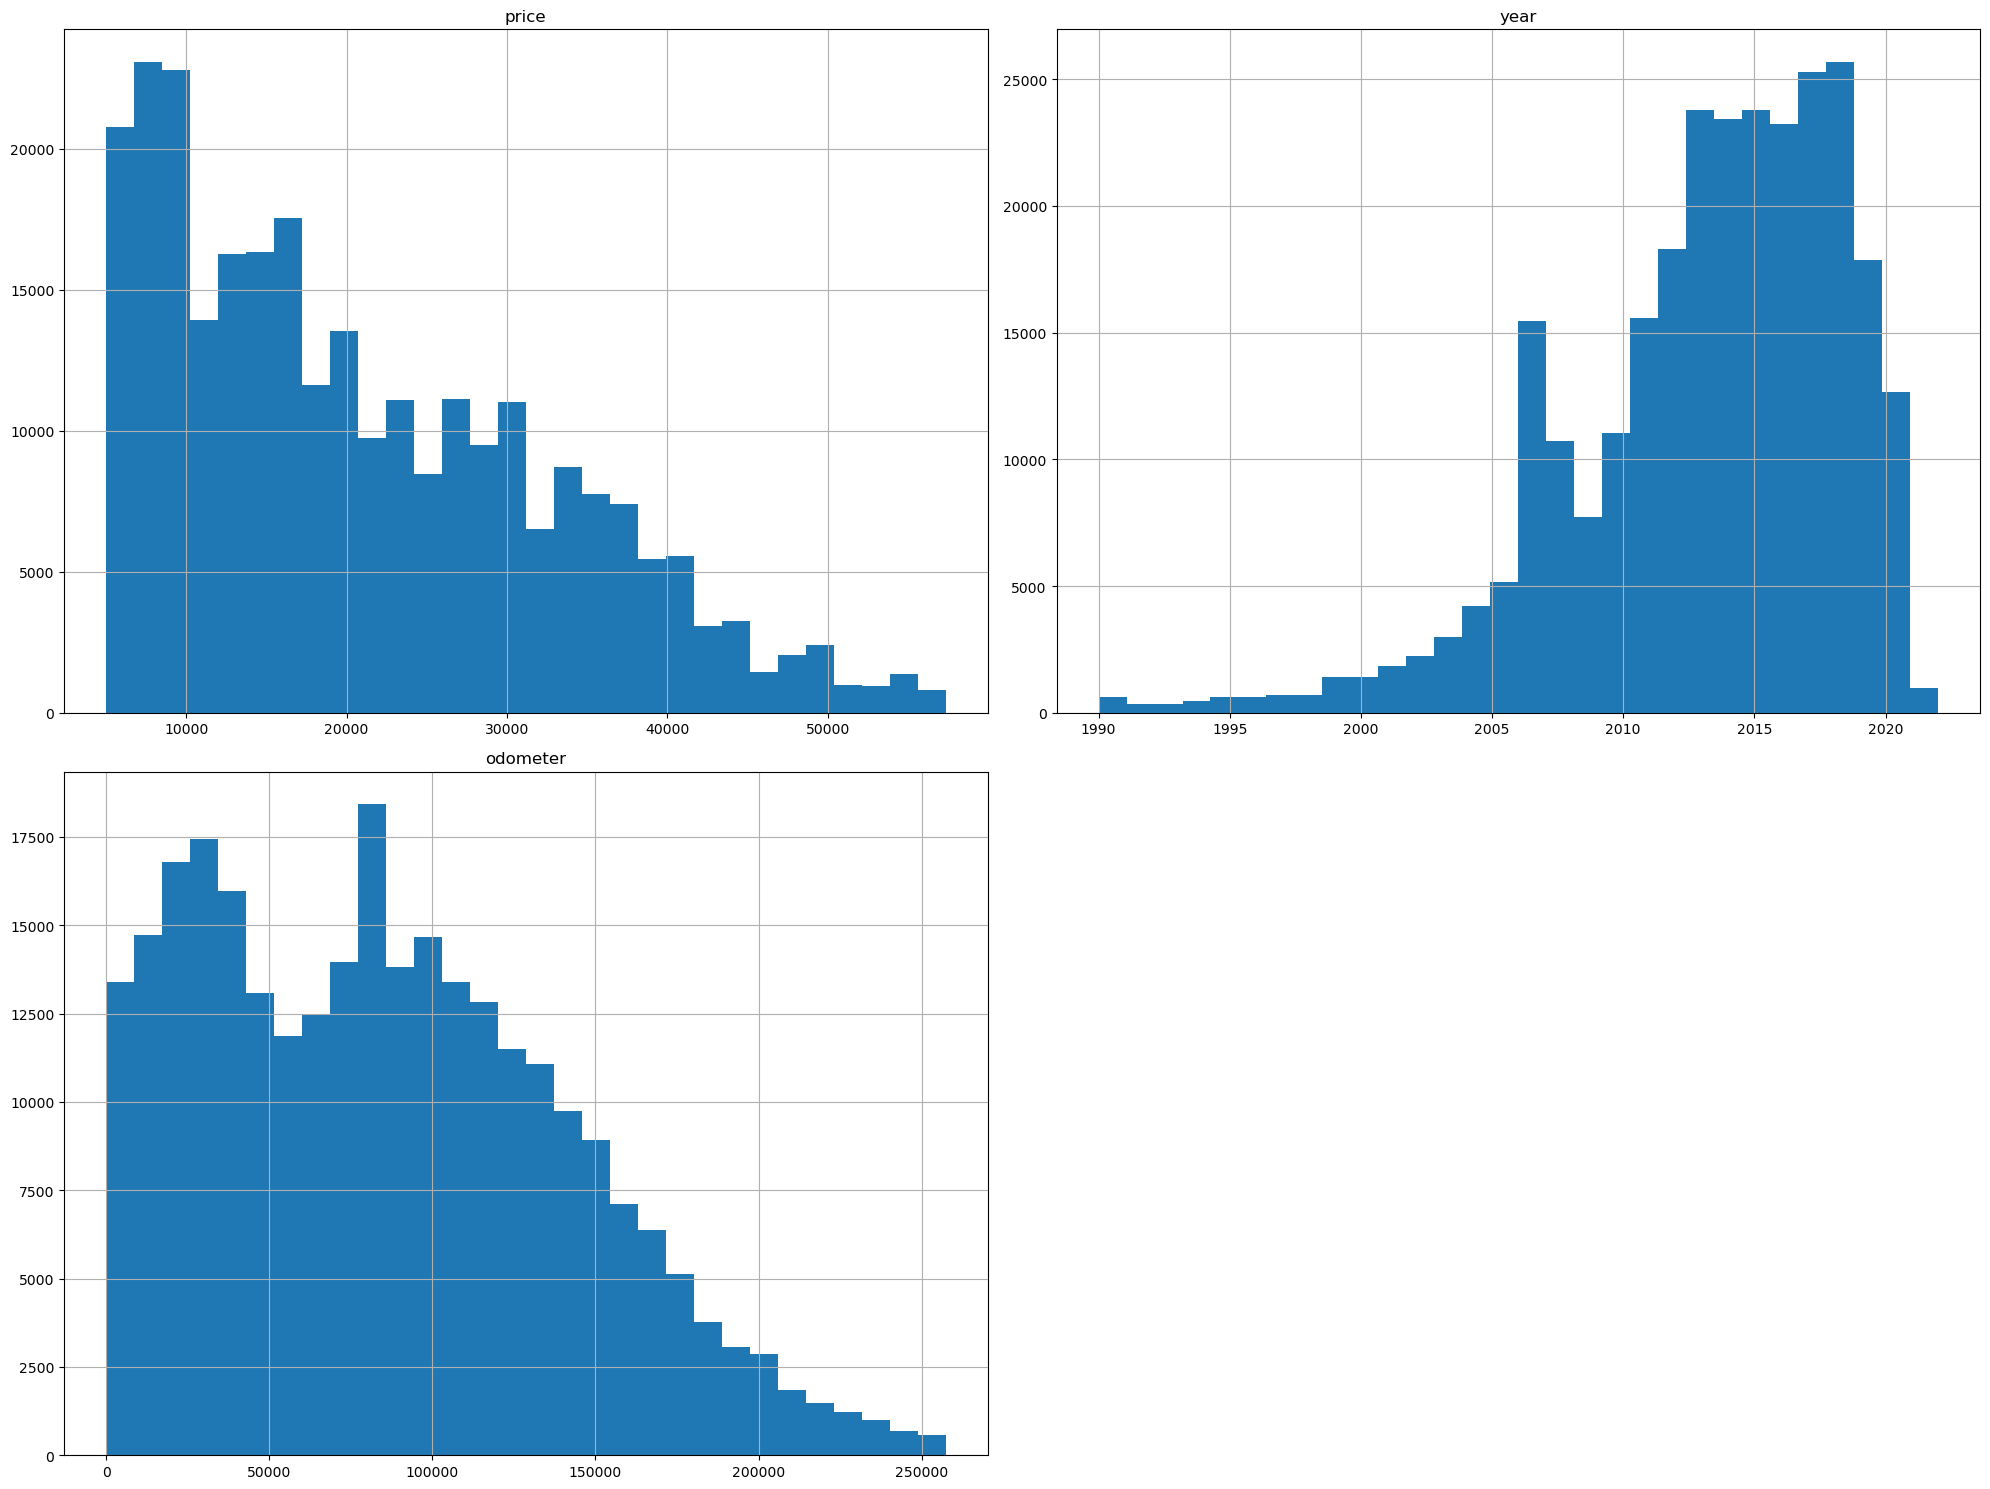

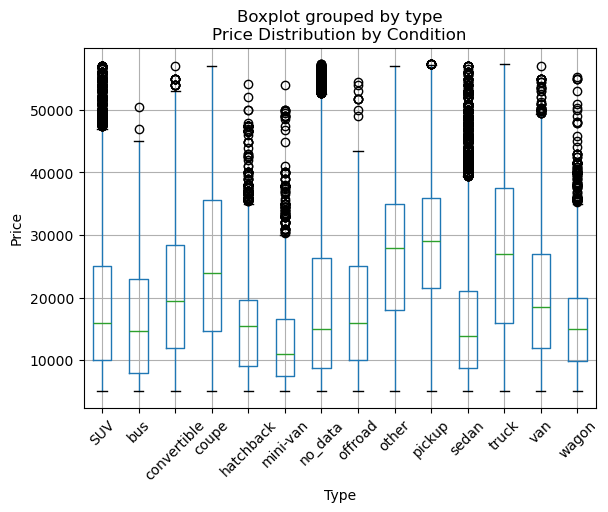

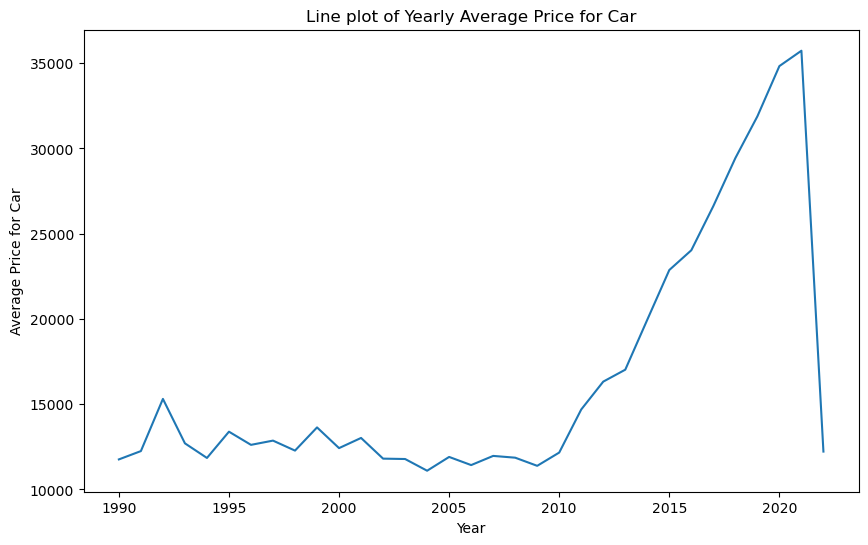

NameError: name 'auto_encoded' is not defined

<Figure size 1000x600 with 0 Axes>

In [90]:
auto['manufacturer'].value_counts().plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Histogram of Manufacturer >5000 ')
plt.show()

counts = auto['year'].value_counts()
sorted_counts = counts.sort_index()
sorted_counts.plot(kind='bar')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.title('Histogram of Model Year')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(auto['state'], bins=30, kde=True)
plt.title('Histogram of States')
plt.xlabel('State')
plt.xticks(rotation=45)  
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(auto['type'], bins=30, kde=True)
plt.title('Histogram of Type')
plt.xticks(rotation=45)  
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(auto['transmission'], bins=30, kde=True)
plt.title('Histogram of Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(auto['drive'], bins=30, kde=True)
plt.title('Histogram of Drive')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(auto['fuel'], bins=30, kde=True)
plt.title('Histogram of Fuel Type')
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(auto['condition'], bins=30, kde=True)
plt.title('Histogram of Auto Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(auto['odometer'], bins=30, kde=True)
plt.title('Odometer After Removing Outliers')
plt.xlabel('Odometer')
plt.ylabel('Count')
plt.show()

auto['price']=auto_no_outliers['price']
plt.figure(figsize=(10, 6))
sns.histplot(auto['price'], bins=30, kde=True)
plt.title('Price Distribution After Removing Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Calculate the average price for each manufacturer
average_price = auto.groupby('manufacturer')['price'].mean().reset_index()

# Create a bar plot of the average price for each manufacturer
# First, sort the data in ascending order by 'price'
average_price_sorted = average_price.sort_values('price')

# Then, plot the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer', y='price', data=average_price_sorted)
plt.title('Average Car Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

auto.hist(bins=30, figsize=(20,15))
plt.tight_layout()  # adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()


# Create a boxplot
auto.boxplot(column='price', by='type')

# Set the title and labels
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Price Distribution by Condition')

# Rotate x labels 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Group the data by year and calculate the mean price for each year
yearly_avg_price = auto.groupby('year')['price'].mean()

# Create a line plot for the yearly average price
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_price.index, yearly_avg_price.values)
plt.xlabel('Year')
plt.ylabel('Average Price for Car')
plt.title('Line plot of Yearly Average Price for Car')
plt.show()


# Define the columns to be plotted
columns = ['year', 'odometer']

# Create a scatter plot for each column
for column in columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(auto_encoded[column], auto['price'])
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter plot of Price vs {column}')
    plt.show()

sns.regplot(data=auto, x="year", y="price", lowess=True)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn import set_config
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
auto.info()

# Correlation matrix for all columns

### Correlation Matrix for Entire Data Set - Top 10 Pos/Neg Correlations

In [317]:
import pandas as pd

def get_top_correlations_with_price(data: pd.DataFrame, target_column: str, top_n: int = 15) -> pd.Series:
    """
    Returns the top N correlations to the specified target column in the DataFrame.

    Args:
    data (pd.DataFrame): The input DataFrame.
    target_column (str): The target column for which correlations are computed.
    top_n (int, optional): Number of top correlations to return. Default is 15.

    Returns:
    pd.Series: The top N correlations to the target column.
    """
    # One-hot encode object type columns and concatenate with numeric columns
    ohe_encoded_df = pd.get_dummies(data.select_dtypes(include=['object']))
    numeric_df = data.select_dtypes(include=['int64', 'float64'])
    combined_df = pd.concat([numeric_df, ohe_encoded_df], axis=1)

    # Compute the correlation matrix
    correlation_matrix = combined_df.corr()

    # Get the top correlations to the target column
    top_correlations = correlation_matrix[target_column].sort_values(ascending=False).head(top_n)
    top_negative_correlations = correlation_matrix[target_column].sort_values(ascending=True).head(top_n)
    return top_correlations, top_negative_correlations

# Example usage
top_price_correlations, top_negative_correlations = get_top_correlations_with_price(auto, 'price')
print(top_price_correlations)
print(top_negative_correlations)


price                 1.000000
year                  0.527981
transmission_other    0.301938
type_pickup           0.246402
fuel_diesel           0.216246
drive_4wd             0.204054
manufacturer_ram      0.176575
fuel_other            0.164609
type_truck            0.160465
condition_good        0.157013
type_other            0.118321
manufacturer_gmc      0.075276
type_coupe            0.068575
state_wa              0.065604
drive_rwd             0.062483
Name: price, dtype: float64
odometer                  -0.503517
drive_fwd                 -0.285530
transmission_automatic    -0.248266
fuel_gas                  -0.244953
condition_excellent       -0.200407
type_sedan                -0.186524
manufacturer_honda        -0.130797
manufacturer_nissan       -0.104855
manufacturer_hyundai      -0.096522
type_no_data              -0.083719
manufacturer_kia          -0.080829
type_hatchback            -0.077644
type_SUV                  -0.077461
manufacturer_volkswagen   -0.069046
man

# Features Importance - Random Forest Regression - All Features


In [368]:
df=auto

# Fill null values
df = df.fillna(method='ffill')

# Convert categorical variables into numerical ones
le = LabelEncoder()
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Define the target variable and the feature matrix
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Print the feature importances
print(feature_importances.sort_values(by='Importance', ascending=False))


C:\Users\scallred\AppData\Local\Temp\ipykernel_22232\1150458017.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


        Feature  Importance
0          year    0.367097
4      odometer    0.198409
6         drive    0.130477
1  manufacturer    0.076941
3          fuel    0.073303
7          type    0.069757
8         state    0.041798
2     condition    0.021955
5  transmission    0.020263


In [421]:
X_train.head()

,year,manufacturer,condition,fuel,odometer,transmission,drive,type,state
271954,2005.0,18,0,2,10985.0,0,1,10,34
256311,2005.0,6,5,0,219534.0,0,2,6,31
360240,2018.0,17,2,2,21295.0,3,2,4,42
393986,2015.0,13,5,2,48889.0,0,3,0,45
317547,2014.0,4,5,0,60916.0,0,0,11,37


# Regression Models - Linear, Polynomial, Ridge, Lasso



In [395]:
auto_encoded = pd.get_dummies(auto)
X = auto_encoded.drop('price', axis=1)
y = auto_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223378 entries, 271954 to 184184
Columns: 108 entries, year to state_wy
dtypes: bool(106), float64(2)
memory usage: 27.7 MB


In [405]:
model= LinearRegression(fit_intercept=False).fit(X_train, y_train)

y_pred= model.predict(X_test)
train_mse= mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)


print(f"train_mse: {train_mse}")
print(f"test_mse: {test_mse}")


train_mse: 47757356.34730945
test_mse: 48601741.37348322


In [399]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223378 entries, 271954 to 184184
Columns: 108 entries, year to state_wy
dtypes: bool(106), float64(2)
memory usage: 27.7 MB


### Linear of top 10 features

In [411]:
features=['year', 'odometer', 'transmission_other', 'drive_fwd','fuel_gas','type_pickup','transmission_automatic','fuel_diesel', 'drive_4wd','condition_excellent']

model= LinearRegression(fit_intercept=False).fit(X_train[features], y_train)

y_pred= model.predict(X_test[features])
train_mse= mean_squared_error(y_train, model.predict(X_train[features]))
test_mse = mean_squared_error(y_test, y_pred)

print(train_mse)
print(test_mse)

72354603.32109658
73092330.60734843


### Polynomial fit of corr() top 10 features

In [412]:

features=['year', 'odometer', 'transmission_other', 'drive_fwd','fuel_gas','type_pickup','transmission_automatic','fuel_diesel', 'drive_4wd','condition_excellent']

train_mses = []
test_mses = []

for i in range(1, 6):
    #create pipeline with PolynomialFeatures degree i

    pipe = Pipeline([('PolyTransformer', PolynomialFeatures(degree = i)), ('linreg', LinearRegression())])

    pipe.fit(X_train[features], y_train)
    #fit on train
    p1 = pipe.predict(X_train[features])
    p2 = pipe.predict(X_test[features])
    #predict on train and test
    train_mses.append(mean_squared_error(y_train, p1))
    test_mses.append(mean_squared_error(y_test, p2))

print(train_mses)
print(test_mses)


KeyboardInterrupt



In [341]:
features=['year', 'odometer', 'transmission_other', 'drive_fwd','fuel_gas','type_pickup','transmission_automatic','fuel_diesel', 'drive_4wd','condition_excellent']

train_mses = []
test_mses = []

for i in range(1, 6):
    # Create pipeline with PolynomialFeatures degree i
    poly_transformer = PolynomialFeatures(degree = i)
    linreg = LinearRegression()
    pipe = Pipeline([('PolyTransformer', poly_transformer), ('linreg', linreg)])

    # Fit on train
    pipe.fit(X_train[features], y_train)

    # Get the coefficients from the 'linreg' step
    coefficients = pipe.named_steps['linreg'].coef_

    # Print the coefficients
    print(f"Coefficients for degree {i}: {coefficients}")

    # Predict on train and test
    p1 = pipe.predict(X_train[features])
    p2 = pipe.predict(X_test[features])

    # Compute and store the MSEs
    train_mses.append(mean_squared_error(y_train, p1))
    test_mses.append(mean_squared_error(y_test, p2))

print(train_mses)
print(test_mses)


Coefficients for degree 1: [ 0.00000000e+00  8.92727522e+02 -7.15939832e-02  3.96822225e+02
 -6.86668840e+03 -1.00664215e+03  3.67131603e+03 -1.15042815e+03
  1.23427775e+04  3.32585511e+03 -1.56626510e+03]
Coefficients for degree 2: [ 3.10931113e+00 -2.02061134e+05  2.21986440e+00  3.73800070e+05
  2.66233628e+05 -4.61180666e+04 -2.03790589e+05 -1.91854821e+05
 -7.47779528e+05 -2.71705215e+05  1.33447278e+05  5.04523230e+01
 -1.15824395e-03 -3.71431854e+02 -2.68281884e+02  4.43118892e+01
  2.04633679e+02  1.87832928e+02  7.47793283e+02  2.72292879e+02
 -1.34596421e+02  1.41444616e-07  1.73337997e-02  2.10124839e-02
 -4.75398907e-03  8.67613344e-04  2.25245571e-02  2.30729908e-02
 -4.89386276e-03  9.10056289e-03  3.73788819e+05 -1.30427362e+03
  3.81689071e+03 -4.89756437e+03  3.88474291e-06 -5.12677058e+03
 -3.60330186e+03 -4.59398548e+03  2.66271565e+05 -9.70440609e+02
  4.86569945e+03  8.20671065e+02 -9.98997273e+03  4.72387183e-06
  3.42232170e+02 -4.61288630e+04 -1.59151971e+03  2

In [103]:
#Train and test MSE's are minimized at i=3

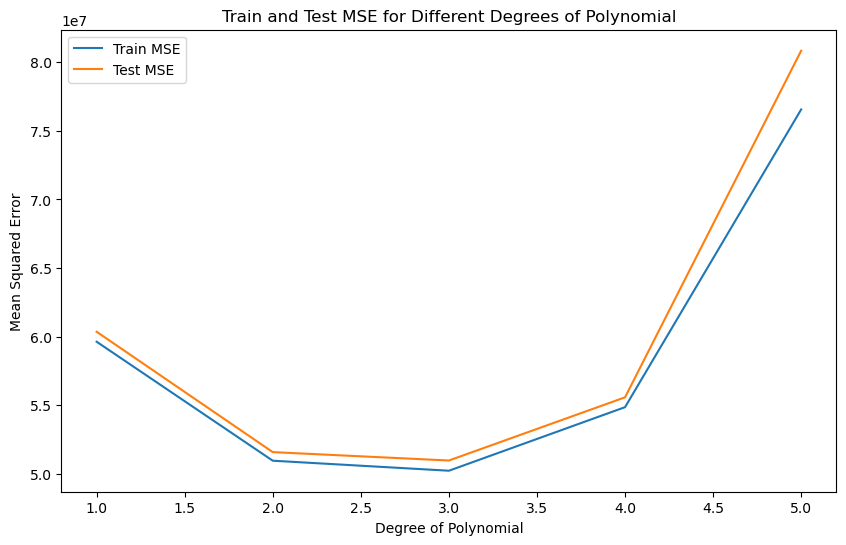

In [343]:
import matplotlib.pyplot as plt

# Define the degrees
degrees = list(range(1, 6))

# Plot the MSEs
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mses, label='Train MSE')
plt.plot(degrees, test_mses, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test MSE for Different Degrees of Polynomial')
plt.legend()
plt.show()


### Ridge Regression

In [354]:
from sklearn.linear_model import RidgeCV

# Define the alphas
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

# Create a RidgeCV model
ridgecv = RidgeCV(alphas=alphas, cv=10)

# Fit the model
ridgecv.fit(X_train, y_train)

# Print the best alpha
print(f"The best alpha for the Ridge Regression model is: {ridgecv.alpha_}")


C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.01121e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.71119e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.12212e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\scallred\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.25833e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users

The best alpha for the Ridge Regression model is: 10.0


Train MSE:  47757356.46
Test MSE:  48601731.18


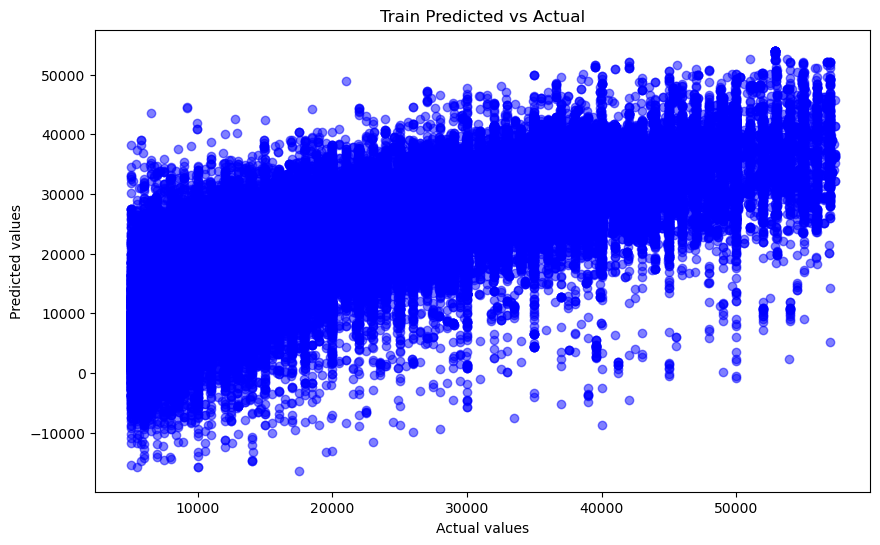

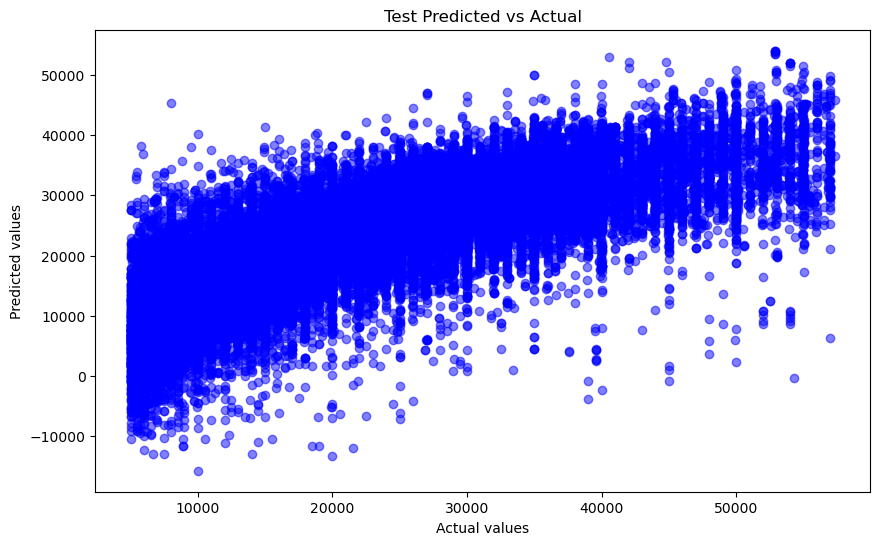

In [357]:
def ridge_regression_analysis(X_train, X_test, y_train, y_test):
    """
    Perform Ridge regression analysis with standard scaling and evaluate the model.

    Args:
    X_train (pandas DataFrame): Training input features.
    X_test (pandas DataFrame): Test input features.
    y_train (pandas Series): Training target values.
    y_test (pandas Series): Test target values.

    Returns:
    None
    """
    # Create a pipeline with StandardScaler and Ridge regressor
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=10.0))
    ])
    
    # Fit the pipeline
    pipe.fit(X_train, y_train)

    # Make predictions
    train_preds = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)

    # Calculate mean squared error
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    # Print MSE
    print(f'Train MSE: {train_mse: .2f}')
    print(f'Test MSE: {test_mse: .2f}')

    # Plotting the predicted vs actual values for the training set
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_preds, color='blue', alpha=0.5)
    plt.title('Train Predicted vs Actual')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()

    # Plotting the predicted vs actual values for the test set
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, test_preds, color='blue', alpha=0.5)
    plt.title('Test Predicted vs Actual')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()

# Call the function with appropriate X_train, X_test, y_train, and y_test
ridge_regression_analysis(X_train, X_test, y_train, y_test)


### Lasso

In [363]:
#Grid search

# Create a Lasso classifier
lasso = Lasso()

# Use Lasso in the SequentialFeatureSelector
selector = SequentialFeatureSelector(lasso, n_features_to_select=4)

# Create a pipeline with the selector and the Lasso classifier
pipe = Pipeline([('column_selector', selector),
                ('lasso', lasso)])

# Define the grid of hyperparameters to search
grid = {'lasso__alpha': [0.1, 0.6, 1.0]}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipe, grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print(f"Best parameters: {best_params}")

# Predict the training and testing data using the best model
train_preds = grid_search.predict(X_train)
test_preds = grid_search.predict(X_test)

# Calculate the mean squared error for the training and testing data
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Print the mean squared error for the training and testing data
print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')


Best parameters: {'lasso__alpha': 0.1}
Train MSE:  64778865.76
Test MSE:  65643507.54


NameError: name 'best_features_df' is not defined

In [374]:
#Select 10 features
lasso = Lasso(alpha=0.1)

# Use Lasso in the SequentialFeatureSelector
selector = SequentialFeatureSelector(lasso, n_features_to_select=6)

best_features = selector.fit_transform(X_train, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())

pipe = Pipeline([('column_selector', selector),
                ('lasso', lasso)])

pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')



#get lasso coefs
coefficients = lasso.coef_

print(coefficients)
best_features_df.head()

Train MSE:  88731669.29
Test MSE:  89704552.25
[ 7.89806851e+02  5.96036535e+02 -1.92080122e+03 -6.11665280e-02
  1.58307565e+03 -8.65018142e+02]


,year,condition,fuel,odometer,transmission,drive
0,2005.0,0.0,2.0,10985.0,0.0,1.0
1,2005.0,5.0,0.0,219534.0,0.0,2.0
2,2018.0,2.0,2.0,21295.0,3.0,2.0
3,2015.0,5.0,2.0,48889.0,0.0,3.0
4,2014.0,5.0,0.0,60916.0,0.0,0.0


In [378]:
best_features_df.head()

,year,condition,fuel,odometer,transmission,drive
0,2005.0,0.0,2.0,10985.0,0.0,1.0
1,2005.0,5.0,0.0,219534.0,0.0,2.0
2,2018.0,2.0,2.0,21295.0,3.0,2.0
3,2015.0,5.0,2.0,48889.0,0.0,3.0
4,2014.0,5.0,0.0,60916.0,0.0,0.0


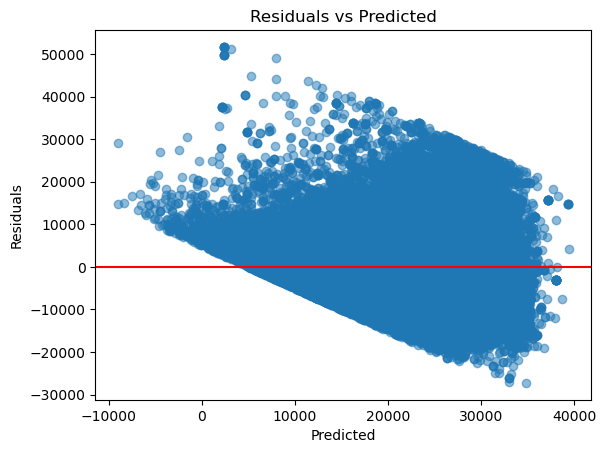

In [421]:
# Calculate the residuals
residuals = y_test - test_preds

# Create a scatter plot of predicted vs residuals
plt.scatter(test_preds, residuals, alpha=0.5)

# Plot a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='-')

# Set the title and labels
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Show the plot
plt.show()
